In [ ]:
#import libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
#for accuracy and loss graph
import matplotlib.pyplot as plt

import tensorflow

print(keras.__version__)
print(tensorflow.__version__)


2.4.3
2.4.1


In [ ]:
train_data_path = "/content/drive/MyDrive/Colab Notebooks/facemask/train"
validation_Data_path = "/content/drive/MyDrive/Colab Notebooks/facemask/val"


In [ ]:
#show aufmented images
def plotImages(images_arr):
  fig, axes = plt.subplots(1,5, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()
  

In [ ]:
#this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

#this is a generator that will read pictures found in
# at train_Data_path, and indefinitely generate
#batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, #this is the target directory
                                       target_size=(200,200), #all images will be resized to 150*150
                                       batch_size=128,
                                       class_mode='binary') #since we use binary_crossentrophy loss, we need binary labels
                                       

Found 7553 images belonging to 2 classes.


In [ ]:
training_data.class_indices

{'with_mask': 0, 'without_mask': 1}

In [ ]:
#this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

#this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_Data_path,
                                               target_size=(200,200),
                                               batch_size=128,
                                               class_mode='binary')


Found 1080 images belonging to 2 classes.


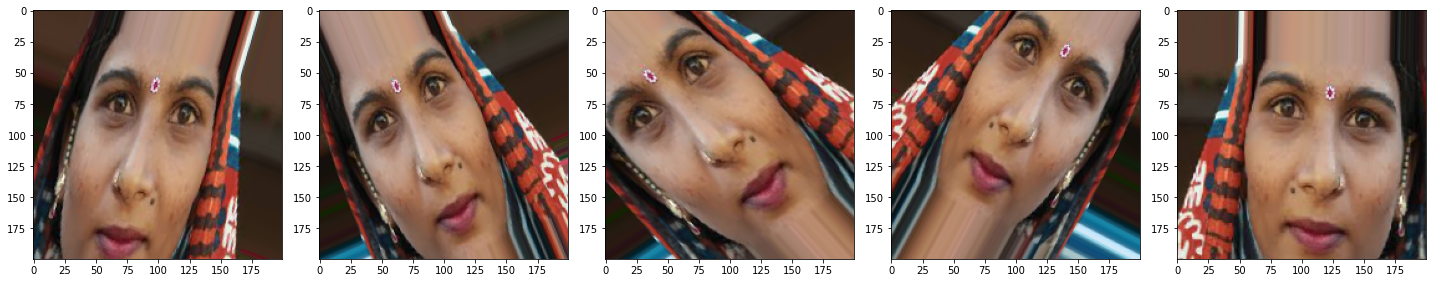

In [ ]:
#showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)


In [ ]:
#save best model using vall accuracy
model_path = '/content/drive/MyDrive/Colab Notebooks/facemask/model.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1,save_best_only=True, mode='max')
callbacks_list = [checkpoint]


In [ ]:
#building and training CNN model
cnn_model = keras.models.Sequential([
                                     keras.layers.Conv2D(filters=32, kernel_size=5, input_shape=[200,200,3]),
                                     keras.layers.MaxPooling2D(pool_size=(4,4)),
                                     keras.layers.Conv2D(filters=64, kernel_size=4),
                                     keras.layers.MaxPooling2D(pool_size=(3,3)),
                                     keras.layers.Conv2D(filters=32, kernel_size=3),
                                     keras.layers.MaxPooling2D(pool_size=(2,2)),

                                     keras.layers.Dropout(0.5),
                                     keras.layers.Flatten(), #neural network building
                                     keras.layers.Dense(units=128, activation='relu'), #input layers
                                     keras.layers.Dropout(0.1),
                                     keras.layers.Dense(units=256, activation='relu'),
                                     keras.layers.Dropout(0.25),
                                     keras.layers.Dense(units=2, activation='softmax') #output layer
])

In [ ]:
#compile CNN model
cnn_model.compile(optimizer = Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#for better accuracy we can reduce learning rate more further
#cnn_model.compile(optimizer = Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#train cnn model
history = cnn_model.fit(training_data,
                        epochs = 10,
                        verbose =1,
                        validation_data=valid_data,
                        callbacks=callbacks_list  
                        ).history


Epoch 1/10
27/60 [============>.................] - ETA: 55s - loss: 0.6964 - accuracy: 0.5527

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


60/60 [==============================] - 103s 2s/step - loss: 0.6277 - accuracy: 0.6300 - val_loss: 0.2336 - val_accuracy: 0.9130

Epoch 00001: val_accuracy improved from -inf to 0.91296, saving model to /content/drive/MyDrive/Colab Notebooks/facemask/model.h5
Epoch 2/10
60/60 [==============================] - 102s 2s/step - loss: 0.4152 - accuracy: 0.8243 - val_loss: 0.2196 - val_accuracy: 0.9213

Epoch 00002: val_accuracy improved from 0.91296 to 0.92130, saving model to /content/drive/MyDrive/Colab Notebooks/facemask/model.h5
Epoch 3/10
60/60 [==============================] - 102s 2s/step - loss: 0.3770 - accuracy: 0.8522 - val_loss: 0.1744 - val_accuracy: 0.9620

Epoch 00003: val_accuracy improved from 0.92130 to 0.96204, saving model to /content/drive/MyDrive/Colab Notebooks/facemask/model.h5
Epoch 4/10
60/60 [==============================] - 101s 2s/step - loss: 0.3458 - accuracy: 0.8614 - val_loss: 0.1267 - val_accuracy: 0.9667

Epoch 00004: val_accuracy improved from 0.96204

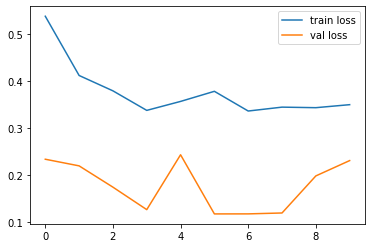

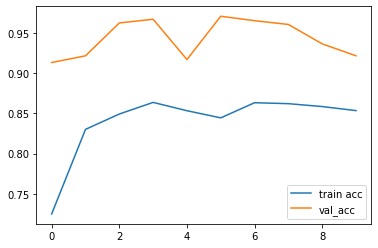

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
#plot the loss
plt.plot(cnn_model.history.history['loss'], label='train loss')
plt.plot(cnn_model.history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('Lossval_loss')
#plot the accuracy
plt.plot(cnn_model.history.history['accuracy'],label='train acc')
plt.plot(cnn_model.history.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')



